In [2]:
!jupyter nbconvert --to script simulate.ipynb

[NbConvertApp] Converting notebook simulate.ipynb to script
[NbConvertApp] Writing 3356 bytes to simulate.py


In [7]:
import util
from plotCommunity import plotCommunity
from transfer import transfer
from community import community
import numpy as np

In [8]:
""" simulate returns an animated 3d scatter plot of the community allIdeas object.
The input parameters are the community, the interaction coefficient gamma, 
and also fn, a string file-name which defaults to date and time."""
def simulate(c=None, T = 80):    
    if c is None:
        c = community(300,3,10)
    Transfer = transfer(c)

    # Data to store c.allIdeas, to then make animation
    dataX = np.zeros((T,c.numberMembers))
    dataY = np.zeros((T,c.numberMembers))
    dataZ = np.zeros((T,c.numberMembers))
    
    posX = np.zeros((T,c.numberMembers))
    posY = np.zeros((T,c.numberMembers))
    
    ideaDist = np.zeros((T,c.domainSize*2+1))

    # Iterate the idea transfer throughout community
    
    for t in range(0,T):
        np.random.seed()
        dataX[t,:] = c.allIdeas[:,0]
        dataY[t,:] = c.allIdeas[:,1]
        dataZ[t,:] = c.allIdeas[:,2]
        
        posX[t,:] = c.allPositions[:,0]
        posY[t,:] = c.allPositions[:,1]
        
        ideaDist[t,:] = c.ideaDistribution[0][0]
        #Transfer.deterministicMerge()
        Transfer.probabilisticMerge()
    
    data = [dataX, dataY, dataZ, posX, posY, ideaDist]
    return data

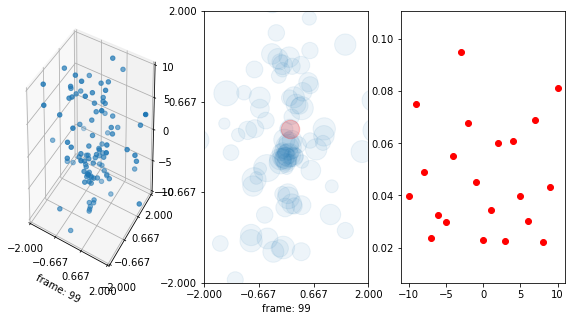

In [9]:
numberIterations = 1
for i in range(1,numberIterations+1):
    c = community(numberMembers=100,numberIdeas=3,domainSize=10)
    data = simulate(c, T=200)
    plotCommunity(c, data, fps=40,fn=str(i))
#     if i < numberIterations:
#         del c

In [6]:
Transfer = transfer(c)

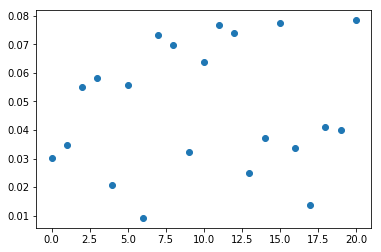

In [4]:
plt.plot(c.ideaDistribution[17][0],'o')
plt.show()

In [5]:
c.ideaDistribution[0][0]

array([ 0.04780709,  0.03799096,  0.05897469,  0.01231754,  0.07716886,
        0.07643708,  0.01286552,  0.07738289,  0.05752565,  0.00227574,
        0.02224207,  0.0578728 ,  0.03974432,  0.00690799,  0.08587209,
        0.01414069,  0.06139571,  0.07177072,  0.05560762,  0.09079554,
        0.03290443])

In [6]:
from scipy import cluster
centroids, loss = cluster.vq.kmeans(c.allPositions,2)
centroids

array([[ 0.52389838, -0.07625522],
       [-0.51069121, -0.08896382]])

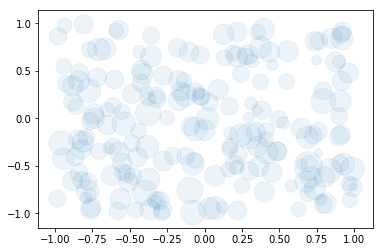

In [25]:
plt.scatter(c.allPositions[:,0],c.allPositions[:,1],s=1000*c.allRadii**2,alpha=0.08)
plt.show()

In [8]:
def closest_centroids(points,centroids):
    distances = np.sqrt(((points - centroids[:,np.newaxis])**2).sum(axis=2))
    return np.argmin(distances,axis=0)

In [9]:
c.ideaDistribution[closest_centroids(c.allPositions,centroids)==0].shape

(96, 10, 21)

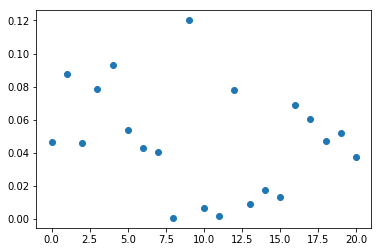

In [26]:
plt.plot(c.ideaDistribution[closest_centroids(c.allPositions, centroids)==0][9][1][:],'o')
plt.show()

In [11]:
X = c.ideaDistribution[closest_centroids(c.allPositions, centroids)==0][:][0]

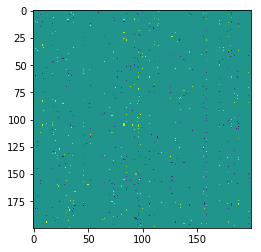

In [28]:
ideaTransfer = Transfer.conditionalAgreement() * Transfer.probInteraction()
plt.imshow(ideaTransfer)
plt.show()

In [13]:
Transfer.conditionalAgreement()

array([[ 0.        , -0.        ,  0.        , ..., -0.67244515,
        -0.        , -0.        ],
       [-0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.        ,
        -0.        , -0.43399406],
       ..., 
       [-0.67244515,  0.        , -0.        , ...,  0.        ,
         0.70485214,  0.        ],
       [-0.        ,  0.        , -0.        , ...,  0.70485214,
         0.        ,  0.        ],
       [-0.        ,  0.        , -0.        , ...,  0.        ,
         0.        ,  0.        ]])

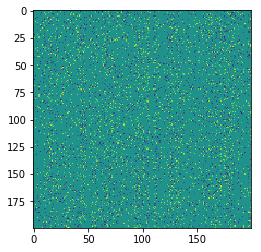

In [29]:
plt.imshow(Transfer.conditionalAgreement())
plt.show()

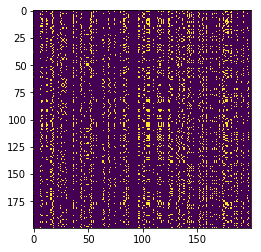

In [30]:
plt.imshow(Transfer.probInteraction())
plt.show()

In [16]:
sum(sum(Transfer.conditionalAgreement() != 0)) / c.numberMembers**2

0.13817499999999999

In [17]:
sum(sum(Transfer.probInteraction()>0))/ c.numberMembers**2

0.10625

In [18]:
sum(sum(Transfer.probInteraction() *(Transfer.conditionalAgreement()>0)))/c.numberMembers**2

0.0074250000000000002

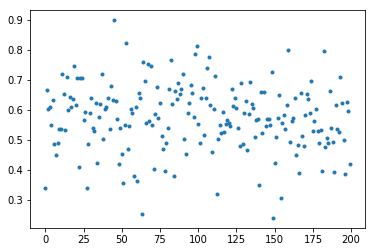

In [31]:
plt.plot(c.allRadii,'.')
plt.show()

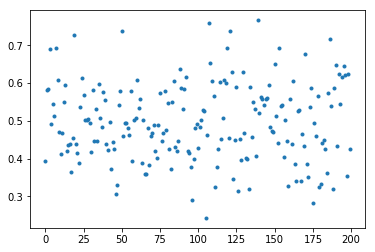

In [32]:
plt.plot(c.allThresholds,'.')
plt.show()

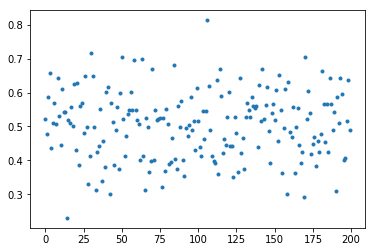

In [33]:
plt.plot(c.allGregariousness,'.')
plt.show()

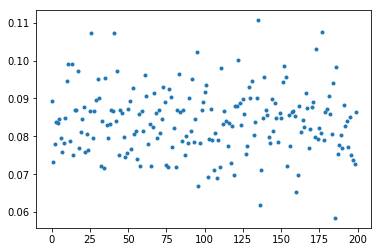

In [34]:
plt.plot(c.allGamma.flatten(),'.')
plt.show()